# fastai quick submission template

Solution overview: https://www.kaggle.com/c/hpa-single-cell-image-classification/discussion/221550

I want to experiment quickly and can't wait for the lb score, especially that with weak labels I haven't found a reasonable way to do CV, and depend on the public lb score. I have pre-processed the public test images in the same way as my prototyping dataset and submit my preds only for this piece. These submissions will get zero score on private, but there is still lots of time in the competition and better approaches will be developed .

In [1]:
import pandas as pd
import numpy as np
import pickle
import torch
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
with open('../input/fastai-cell-tile-prototyping-3/tta.pickle', 'rb') as handle:
    preds = pickle.load(handle)

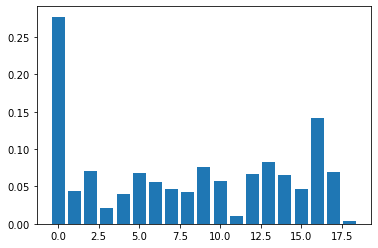

In [3]:
class_means = preds.mean(dim=0).numpy()
labels = range(19)
plt.bar(labels, class_means)
plt.show()

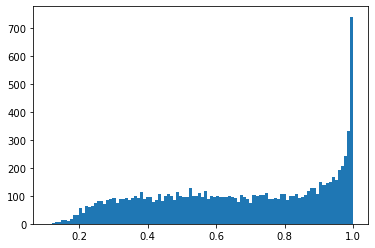

In [4]:
row_max = preds.max(dim=-1).values.numpy()
plt.hist(row_max, bins=100)
plt.show()

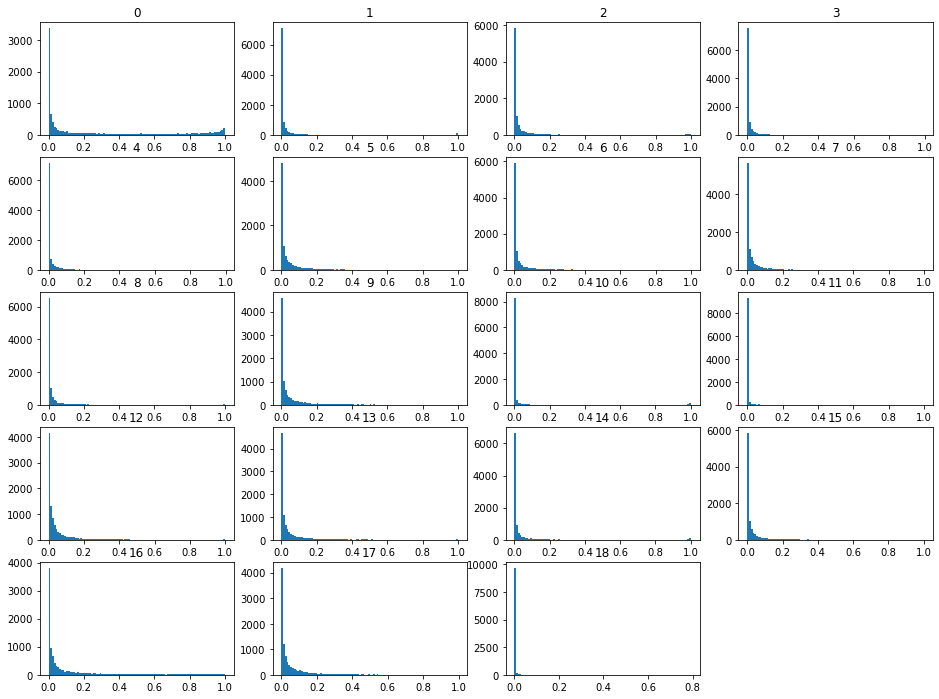

In [5]:
fig = plt.figure(figsize=(16, 12))

for i in labels:
    ax = fig.add_subplot(5,4,i+1)
    ax.hist(preds[:,i].numpy(), bins=100)
    ax.set_title(i)

plt.show()

In [6]:
cell_df = pd.read_csv('../input/fastai-cell-tile-prototyping-3/cell_df.csv')
cell_df.head()
cell_df['cls'] = ''

In [7]:
threshold = 0.0

for i in range(preds.shape[0]): 
    p = torch.nonzero(preds[i] > threshold).squeeze().numpy().tolist()
    if type(p) != list: p = [p]
    if len(p) == 0: cls = [(preds[i].argmax().item(), preds[i].max().item())]
    else: cls = [(x, preds[i][x].item()) for x in p]
    cell_df['cls'].loc[i] = cls

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
def combine(r):
    cls = r[0]
    enc = r[1]
    classes = [str(c[0]) + ' ' + str(c[1]) + ' ' + enc for c in cls]
    return ' '.join(classes)

combine(cell_df[['cls', 'enc']].loc[24])

'0 0.007882548496127129 eNrVln1vozgQh7+SB9ym1Z1225XutK1hwLwF8oINJCnhxXz//85Dmm63TXS3Oumkcyr8zG/GgCfuZPb9ywSLdgInAHR9Bx3knp09Lm4YBMwO0lgAzPG/Kok1NiMYmHVAmhkLKHL+o88sveJH/Xy9bJ/mzx8WOBQX0Js47+OsNV9n/WP8WXfQ9bhP6uydX/j1etk+30c/hmKSgbwJDZPCyCC8iYgGosSwWLQyMHxpWCm2Mmh4bZgSGxnUvDFMi7UMKr43rBZLGSjeGtYKKYOCG8OOIpRBzifDOjGFwZKHE+uFCYOMy4mNog+DlCdEXRgkPCNqiYqJGVGRV09s6x0m7Nx1CJnXTNi7W6KKSIWQe2uiQwhrL5ywdUMJhWeMpYhoIEqk9R6I1hJWnjJ4dBtp77I2tFZC6uUGB/dImjQ4umEEsTeMGPI0gtA7jih5EcEoDiMmfBNBL/SIOa8iaEU+YsmPEdQiHVHxIYJKRCNqPhGZwVIUWxoH602IOtKyGPSJlkQt0SoGJXYD1nwbQymqARuuY9iKcsAdb4jWpB2IctKOMWxEOuCeDzGsRDzgCzcxFCIcsOUygVyMPR55mkAmjj32PE8gFYceB74irSGtTGApyh473pC2Ju1AcTnFDQnEIuzRcJlaGjpLCVFHlBG1REUKkdh3OPENke4wvKlSsCesxo3f3e4XeQbT81Dj1u+tVWQgRV1j5UeLarElX3mymkWV2d1sj3Y3DdGa6IVos8PeKx2zWBZ2l8sddp5ywrt1YXfw0mDmj85uoQqb0WWDo5e7u0Vd2FymDUZ+7DaLtrAZi8kqneJOreDwHDUorbW6a1Y2X0WNyovc1d1hZXOR22rgDdY3rCAhq/KOUN5Pa4ieM7I6a8Ub6+vt83i2sVnbNTYbmw1lrUZ9G5bQ3thSci4c83D9k3Wer/l/dd0l+/zfTzM6p5L0rpCd77xXgdIoNasVjCrQGiPNtIJe

In [9]:
cell_df['pred'] = cell_df[['cls', 'enc']].apply(combine, axis=1)
cell_df.head()

,image_id,fname,r_mean,g_mean,b_mean,cell_id,size1,size2,enc,cls,pred
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0040581b-f1f2-4fbe-b043-b6bfea5404bb_1.jpg,0.042343,0.032151,0.073973,1,342,1050,eNqtVm2PojAQ/ksMZe+Sy21yubtc4gKDIkpBUJQ3KyD//9...,"[(0, 0.012538387440145016), (1, 0.001354407984...",0 0.012538387440145016 eNqtVm2PojAQ/ksMZe+Sy21...
1,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0040581b-f1f2-4fbe-b043-b6bfea5404bb_2.jpg,0.034332,0.027210,0.045968,2,762,680,eNrVUm1PwkAM/kvt3XgRjEajvO7uhGCEEHCgcSQi/v9vXt...,"[(0, 0.0036119993310421705), (1, 0.00033663905...",0 0.0036119993310421705 eNrVUm1PwkAM/kvt3XgRjE...
2,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0040581b-f1f2-4fbe-b043-b6bfea5404bb_3.jpg,0.093926,0.033953,0.078939,3,398,470,eNoLCEgJMg4wDMg3NPQ39Df2NfaF0EZ+IBoBIXzc8oSgAR...,"[(0, 0.10573285818099976), (1, 0.0068248808383...",0 0.10573285818099976 eNoLCEgJMg4wDMg3NPQ39Df2...
3,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0040581b-f1f2-4fbe-b043-b6bfea5404bb_4.jpg,0.120287,0.085569,0.099383,4,372,344,eNptUstOAzEM/CUnXtoiAQcegnbzOMAFgdRFbIXEpf9/q+...,"[(0, 0.05264211818575859), (1, 0.0191836468875...",0 0.05264211818575859 eNptUstOAzEM/CUnXtoiAQce...
4,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0040581b-f1f2-4fbe-b043-b6bfea5404bb_5.jpg,0.088759,0.076198,0.077768,5,544,244,eNp9UcuSmzAQ/CVGku1U8CGpxBs7EsMrPNdgMNYasIH/v0...,"[(0, 0.2023262232542038), (1, 0.00806537643074...",0 0.2023262232542038 eNp9UcuSmzAQ/CVGku1U8CGpx...


In [10]:
subm = cell_df.groupby(['image_id'])['pred'].apply(lambda x: ' '.join(x)).reset_index()
# subm = subm.loc[3:]
subm.head()

,image_id,pred
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0 0.012538387440145016 eNqtVm2PojAQ/ksMZe+Sy21...
1,004a270d-34a2-4d60-bbe4-365fca868193,0 0.002640289254486561 eNoLCEhJMAgwDMg3NPQ39Df...
2,00537262-883c-4b37-a3a1-a4931b6faea5,0 1.5224196431518067e-05 eNqFUE0LwjAM/UtJuqlM8...
3,00c9a1c9-2f06-476f-8b0d-6d01032874a2,0 0.0007290405919775367 eNrtVUtvwjAM/ktxAutp2m...
4,0173029a-161d-40ef-af28-2342915b22fb,0 0.06183969974517822 eNqtlFuXmjAQgP8SDOgB2pee...


In [11]:
sample_submission = pd.read_csv('../input/hpa-single-cell-image-classification/sample_submission.csv')
sample_submission.head()

,ID,ImageWidth,ImageHeight,PredictionString
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
1,004a270d-34a2-4d60-bbe4-365fca868193,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
2,00537262-883c-4b37-a3a1-a4931b6faea5,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
3,00c9a1c9-2f06-476f-8b0d-6d01032874a2,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
4,0173029a-161d-40ef-af28-2342915b22fb,3072,3072,0 1 eNoLCAgIsAQABJ4Beg==


In [12]:
sub = pd.merge(
    sample_submission,
    subm,
    how="left",
    left_on='ID',
    right_on='image_id',
)
sub.head()

,ID,ImageWidth,ImageHeight,PredictionString,image_id,pred
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==,0040581b-f1f2-4fbe-b043-b6bfea5404bb,0 0.012538387440145016 eNqtVm2PojAQ/ksMZe+Sy21...
1,004a270d-34a2-4d60-bbe4-365fca868193,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==,004a270d-34a2-4d60-bbe4-365fca868193,0 0.002640289254486561 eNoLCEhJMAgwDMg3NPQ39Df...
2,00537262-883c-4b37-a3a1-a4931b6faea5,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==,00537262-883c-4b37-a3a1-a4931b6faea5,0 1.5224196431518067e-05 eNqFUE0LwjAM/UtJuqlM8...
3,00c9a1c9-2f06-476f-8b0d-6d01032874a2,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==,00c9a1c9-2f06-476f-8b0d-6d01032874a2,0 0.0007290405919775367 eNrtVUtvwjAM/ktxAutp2m...
4,0173029a-161d-40ef-af28-2342915b22fb,3072,3072,0 1 eNoLCAgIsAQABJ4Beg==,0173029a-161d-40ef-af28-2342915b22fb,0 0.06183969974517822 eNqtlFuXmjAQgP8SDOgB2pee...


In [13]:
def isNaN(num):
    return num != num

for i, row in sub.iterrows():
    if isNaN(row['pred']): continue
    sub.PredictionString.loc[i] = row['pred']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
sub = sub[sample_submission.columns]
sub.head()

,ID,ImageWidth,ImageHeight,PredictionString
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,2048,2048,0 0.012538387440145016 eNqtVm2PojAQ/ksMZe+Sy21...
1,004a270d-34a2-4d60-bbe4-365fca868193,2048,2048,0 0.002640289254486561 eNoLCEhJMAgwDMg3NPQ39Df...
2,00537262-883c-4b37-a3a1-a4931b6faea5,2048,2048,0 1.5224196431518067e-05 eNqFUE0LwjAM/UtJuqlM8...
3,00c9a1c9-2f06-476f-8b0d-6d01032874a2,2048,2048,0 0.0007290405919775367 eNrtVUtvwjAM/ktxAutp2m...
4,0173029a-161d-40ef-af28-2342915b22fb,3072,3072,0 0.06183969974517822 eNqtlFuXmjAQgP8SDOgB2pee...


In [15]:
sub.to_csv('submission.csv', index=False)